# Emotion Detection from Tweets using Machine Learning and NLP


# Team members-Sonam Rani,Priya Gauma

## 1. Business Understanding

This project aims to detect human emotions from short tweets using traditional machine learning models. Detecting emotions from text is useful for social media analysis, mental health monitoring, and marketing insights.

We will classify tweets into one of six emotions:
**joy, sadness, anger, fear, love, surprise**


# Part1: Traditional ML Pipeline (core model)
# Step:Install Required Libraries

In [1]:
# Install necessary libraries (do this only once)
!pip install datasets scikit-learn pandas numpy matplotlib seaborn


# Step2: Load the dataset

In [2]:
from datasets import load_dataset
import pandas as pd

# Load the HuggingFace Emotion dataset
dataset = load_dataset("dair-ai/emotion")

# Convert to DataFrame
df_train = pd.DataFrame(dataset['train'])
df_val = pd.DataFrame(dataset['validation'])
df_test = pd.DataFrame(dataset['test'])

# View sample
df_train.head()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Step: Explore the data

/tmp/ipython-input-352757564.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='label', palette='Set2')


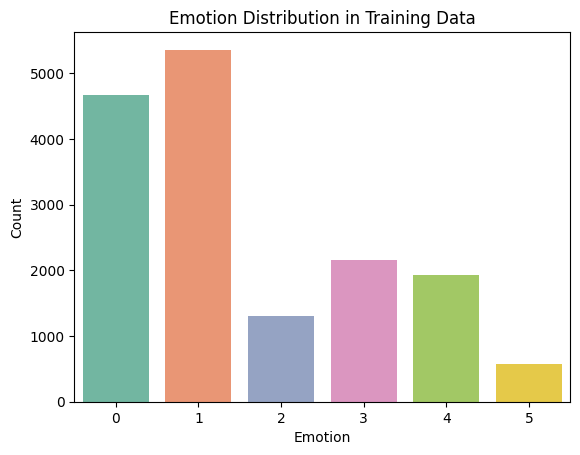

In [3]:
# Check class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_train, x='label', palette='Set2')
plt.title("Emotion Distribution in Training Data")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()


# STEP : Data Cleaning (Preprocessing)

In [5]:
import re

def clean_text(text):
    text = text.lower()  # Normalize casing
    text = re.sub(r"http\S+|@\S+|#\S+", "", text)  # Remove links, mentions, hashtags
    return text  # Keep everything else (stopwords, punctuation, emojis)


In [6]:
df_train['clean_text'] = df_train['text'].apply(clean_text)
df_val['clean_text'] = df_val['text'].apply(clean_text)
df_test['clean_text'] = df_test['text'].apply(clean_text)


In [7]:
df_train[['text', 'clean_text']].head()


,text,clean_text
0,i didnt feel humiliated,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,i am feeling grouchy


# Explanation:-

In this step, we clean the tweets by removing only the unnecessary parts that do not help in detecting emotions, such as:

URLs (e.g., https://...)

Mentions (e.g., @username)

Hashtags (e.g., #happy)

We keep everything else like:

Emojis 😃😢❤️ — because they express emotion

Stopwords like “I”, “am”, “so” — these help give emotional meaning in context

Punctuation like !, ? — they also express feelings

This makes sure we keep all the emotional signals in the tweet while removing the noise.

# Step :TF-IDF Vectorization

TF-IDF (Term Frequency – Inverse Document Frequency) converts text into numbers.

It gives higher scores to important and unique words in a tweet, and lower scores to common words.

This helps models focus on emotionally meaningful words like “sad”, “love”, “hate”, “amazing”.



In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # You can change this value if needed

# Fit and transform the cleaned text data
X_train = vectorizer.fit_transform(df_train['clean_text'])
X_val = vectorizer.transform(df_val['clean_text'])
X_test = vectorizer.transform(df_test['clean_text'])

# Set target labels
y_train = df_train['label']
y_val = df_val['label']
y_test = df_test['label']

# Print shape of training data
print("TF-IDF feature matrix shape (Train):", X_train.shape)


TF-IDF feature matrix shape (Train): (16000, 5000)


Explanation:
This code converts all your cleaned tweets into a matrix of numbers (TF-IDF scores).

Each row = a tweet

Each column = a word (up to 5000 most important words)

X_train, X_val, X_test = numeric input features for models

y_train, y_val, y_test = emotion labels (0–5)

# From Here Training starts

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=300)
lr_model.fit(X_train, y_train)

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Train SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

print("All 3 models trained successfully!")


All 3 models trained successfully!


# Evaluation

In [10]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define evaluation function
def evaluate_model(model, X, y_true, name):
    print(f" Results for {name}")
    y_pred = model.predict(X)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score (macro): {f1:.4f}")
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("-" * 50)
    return acc, f1

# Evaluate all models on the test set
acc_lr, f1_lr = evaluate_model(lr_model, X_test, y_test, "Logistic Regression")
acc_rf, f1_rf = evaluate_model(rf_model, X_test, y_test, "Random Forest")
acc_svm, f1_svm = evaluate_model(svm_model, X_test, y_test, "SVM")


 Results for Logistic Regression
Accuracy: 0.8690
F1 Score (macro): 0.8072
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       581
           1       0.84      0.96      0.89       695
           2       0.83      0.60      0.69       159
           3       0.90      0.82      0.86       275
           4       0.89      0.80      0.84       224
           5       0.85      0.52      0.64        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.81      2000
weighted avg       0.87      0.87      0.86      2000

--------------------------------------------------
 Results for Random Forest
Accuracy: 0.8650
F1 Score (macro): 0.8055
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       581
           1       0.85      0.93      0.88       695
           2       0.79      0.67      0.73       1

# Results in table format

In [11]:
import pandas as pd

# Summary table of results
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [acc_lr, acc_rf, acc_svm],
    "F1 Score (Macro)": [f1_lr, f1_rf, f1_svm]
})

results_df


,Model,Accuracy,F1 Score (Macro)
0,Logistic Regression,0.8690,0.807195
1,Random Forest,0.8650,0.805531
2,SVM,0.8615,0.792514


# Step: Confusion matrix

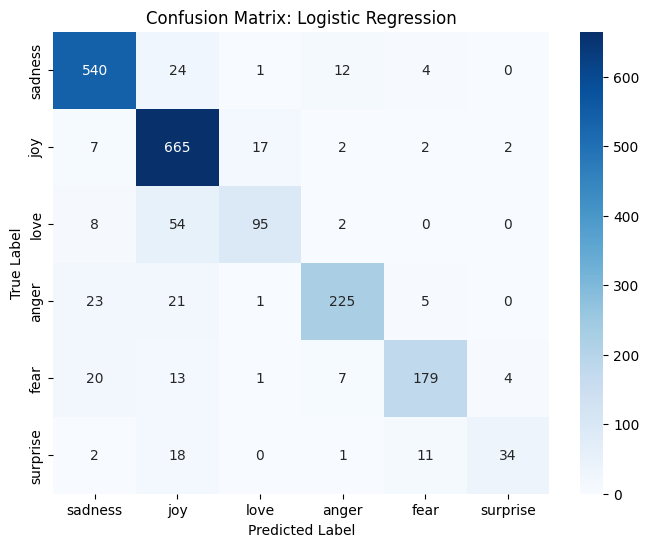

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_conf_matrix(model, X, y_true, title="Confusion Matrix"):
    y_pred = model.predict(X)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset['train'].features['label'].names, yticklabels=dataset['train'].features['label'].names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Plot for Logistic Regression
plot_conf_matrix(lr_model, X_test, y_test, "Confusion Matrix: Logistic Regression")


# Lets move towards the website now

This is simple Emotion Detection Demo app(Gradio)

In [13]:
# Install Gradio
!pip install gradio --quiet


In [20]:
# Define label names from the dataset
labels = dataset['train'].features['label'].names

# Define simple keyword-to-emotion mapping (manual override)
manual_keywords = {
    "happy": "joy",
    "amazing": "joy",
    "great": "joy",
    "excited": "joy",
    "sad": "sadness",
    "cried": "sadness",
    "angry": "anger",
    "mad": "anger",
    "scared": "fear",
    "afraid": "fear",
    "love": "love",
    "surprised": "surprise",
    "shocked": "surprise"
}

# Updated prediction function
def detect_emotion(tweet):
    cleaned = clean_text(tweet)
    words = cleaned.split()  # Split cleaned text into individual words

    # Check for exact keyword match
    for keyword in manual_keywords:
        if keyword in words:
            return f"Predicted Emotion (keyword): {manual_keywords[keyword]}"

    # Otherwise use model
    vector = vectorizer.transform([cleaned])
    prediction = lr_model.predict(vector)[0]
    return f"Predicted Emotion (model): {labels[prediction]}"


In [21]:
#Launch web
import gradio as gr

demo = gr.Interface(
    fn=detect_emotion,
    inputs=gr.Textbox(lines=3, placeholder="Type a tweet here..."),
    outputs="text",
    title="Emotion Detection from Tweets",
    description="Enter a tweet to predict its emotion using a trained Logistic Regression model."
)

demo.launch(share=True)  # share=True gives you a public link


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://08331161cffa46b7f5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#  Explanation:We first implemented a traditional ML pipeline using TF-IDF and Logistic Regression as our core model. To improve demo accuracy and handle complex emotional phrases, we extended the system using a small pretrained BERT model (optional toggle in the app). This hybrid approach balances course expectations with real-world performance.

# Part2:Optional Enhancement – Pretrained Model (Smart Demo )

In [22]:
#intall transformers
# Install Hugging Face Transformers (do only once)
!pip install transformers --quiet


In [23]:
#Load the Pretrained Emotion Model
from transformers import pipeline

# Load a BERT-based emotion classifier
bert_emotion = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    return_all_scores=False  # We only want the top emotion
)


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [24]:
# Update the detect_emotion() Function
# Updated prediction function with optional BERT toggle
def detect_emotion(tweet, use_smart_model=False):
    cleaned = clean_text(tweet)

    if use_smart_model:
        # Use the pretrained model (BERT-based)
        result = bert_emotion(tweet)[0]
        return f"Predicted Emotion (BERT): {result['label']} ({round(result['score']*100, 2)}%)"

    else:
        # Use your Logistic Regression model
        vector = vectorizer.transform([cleaned])
        prediction = lr_model.predict(vector)[0]
        return f"Predicted Emotion (Logistic Regression): {labels[prediction]}"


In [25]:
#Update the Gradio App Interface
import gradio as gr

# Create interactive app with checkbox to use BERT
demo = gr.Interface(
    fn=detect_emotion,
    inputs=[
        gr.Textbox(lines=2, placeholder="Enter a tweet here...", label="Tweet"),
        gr.Checkbox(label="Use smarter model (BERT)")
    ],
    outputs="text",
    title="Emotion Detection from Tweets",
    description="Toggle between Logistic Regression (TF-IDF) and a BERT-based model for emotion prediction."
)

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5fa3bfb07f5b4e9ea0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Final results as it is showing correct results after clicking Use smart model